In [124]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [125]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [126]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


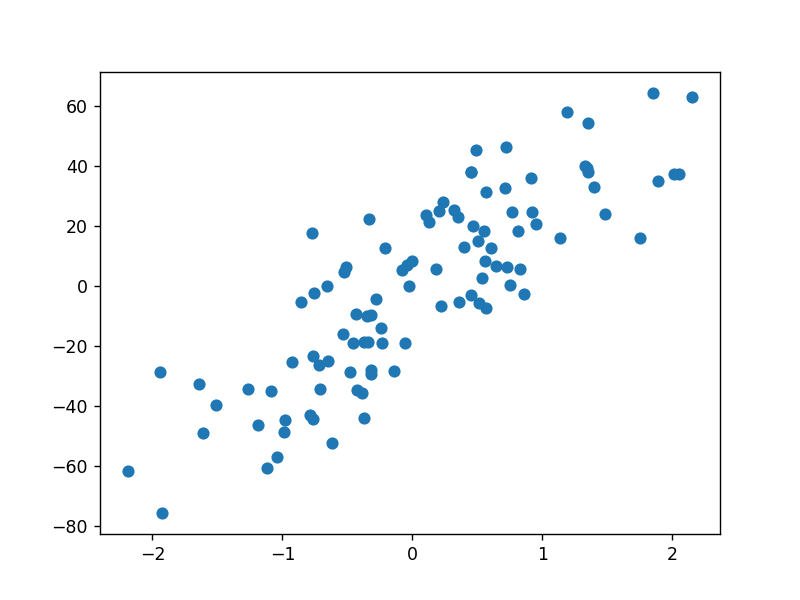

In [127]:
plt.scatter(X,y)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [130]:
lr.fit(X_train,y_train)

LinearRegression()

In [131]:
lr.coef_

array([27.74413257])

In [132]:
lr.intercept_

-1.041375349970885

In [133]:
y_pred=lr.predict(X_test)

In [134]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8483578787400254

<IPython.core.display.Javascript object>


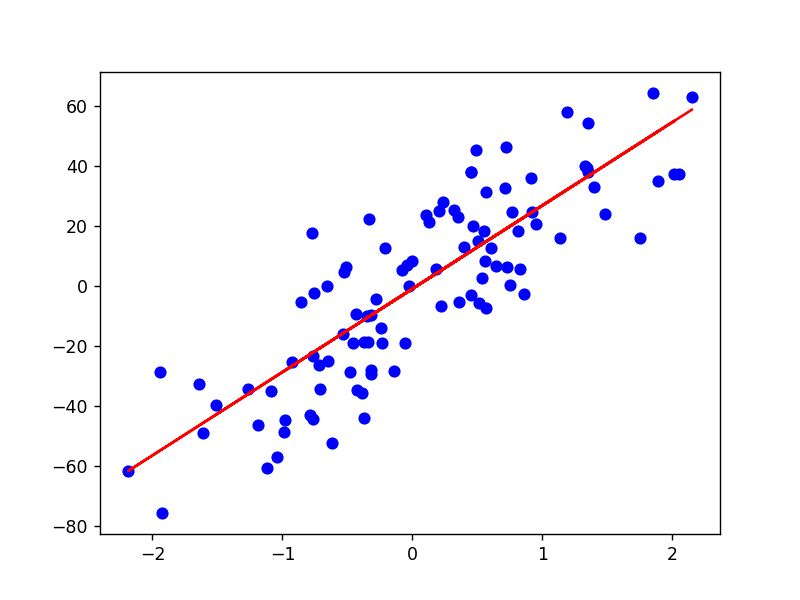

In [135]:
plt.scatter(X,y,color='b')
plt.plot(X_test,lr.predict(X_test),color='r')

# Gradient Descent 

In [136]:
class GD:
    def __init__(self,learning_rate,epochs):
        self.m=29.19
        self.b=-120
        
     
        self.lr = learning_rate
        self.epochs=epochs
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            
            self.m = self.m - (self.lr * loss_slope_m)
            self.b = self.b - (self.lr * loss_slope_b)
        print(self.b)
        print(self.m)
    def predict(self,X):
        return self.m * X + self.b
        

In [137]:
gd = GD(0.001,100)

In [138]:
gd.fit(X_train,y_train)

-1.0413970249532956
27.744216259503695


In [139]:
y_pred=gd.predict(X_test)

In [140]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8483581084750615

<IPython.core.display.Javascript object>


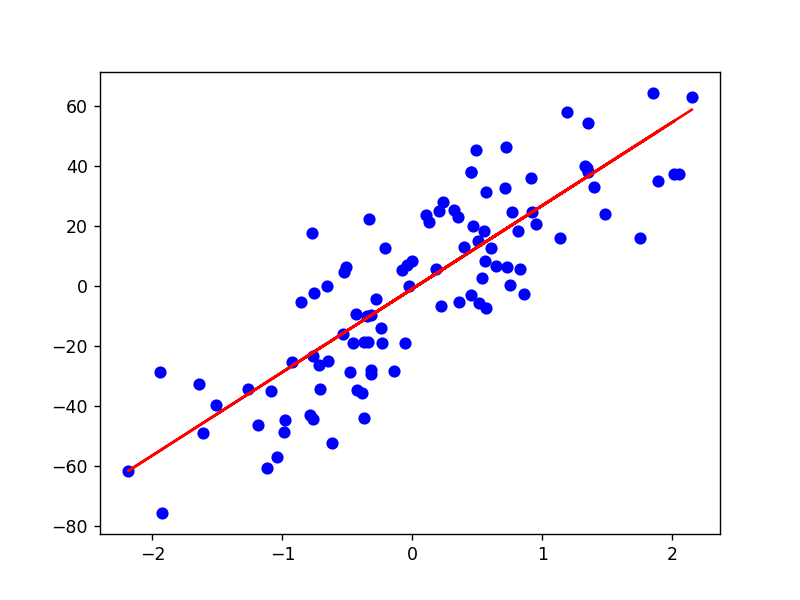

In [141]:
plt.scatter(X,y,color='b')
plt.plot(X_test,gd.predict(X_test),color='r')

## Types of GD :
- Batch GD 
- Stochastics GD
- Mini-Batch GD

## Batch Gradient Descent

In [142]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [144]:
X_train.shape

(353, 10)

In [145]:
class BGD:
    def __init__(self,learning_rate,epochs):
        self.coef_=None
        self.intercept_=None
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X_train,y_train):
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
            
        print(self.coef_)
        print(self.intercept_)
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
      
            
        

In [146]:
bgd = BGD(0.9,100)

In [147]:
bgd.fit(X_train,y_train)

[  52.70298935  -25.75216138  248.51704847  191.7858316    47.62537848
   27.35007959 -145.16324577  137.76852846  216.42020242  124.85482824]
152.0298637015296


In [148]:
y_pred=bgd.predict(X_test)

In [149]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3129539362450152

In [150]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [151]:
lr.fit(X_train,y_train)

LinearRegression()

In [152]:
y_pred = lr.predict(X_test)

In [153]:
r2_score(y_test,y_pred)

0.42795358656236626

In [154]:
lr.coef_

array([ -18.20584205, -242.8646036 ,  504.58268006,  344.05222055,
       -790.96918634,  553.46023288,   63.55289926,  153.63208395,
        729.69503903,   59.87447832])

In [155]:
lr.intercept_

151.648231355704

## Stochastics GD

In [156]:
import numpy as np

In [157]:
class SGD:
    def __init__(self,learning_rate,epochs):
        self.coef_=None
        self.intercept_=None
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X_train,y_train):
      
            
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
            
        print(self.coef_)
        print(self.intercept_)
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [158]:
sgd = SGD(0.1,100)

In [159]:
sgd.fit(X_train,y_train)

[ -15.70973619 -255.70874473  524.43266042  345.69024453 -114.50843058
   -6.29563856 -223.77377052   92.62700006  457.59997153   80.45902394]
130.53586030251805


In [160]:
y_pred = sgd.predict(X_test)

In [161]:
r2_score(y_test,y_pred)

0.3294559557866976

## SGD Regressor in Sklearn Library

In [162]:
from sklearn.linear_model import SGDRegressor

In [163]:
sgd = SGDRegressor(max_iter=300,learning_rate='constant',eta0=0.01)

In [164]:
sgd.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=300)

In [165]:
y_pred = sgd.predict(X_test)

In [166]:
r2_score(y_test,y_pred)

0.3632047652552649

In [167]:
import random

## Mini-Batch GD

In [172]:
class MBGD:
    def __init__(self,batch_size,learning_rate,epochs):
        self.coef_=None
        self.intercept_=None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size=batch_size
   
    def fit(self,X_train,y_train):
      
            
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
            
        print(self.coef_)
        print(self.intercept_)
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [201]:
mbgd=MBGD(batch_size=int(X_train.shape[0]/25),learning_rate=0.1,epochs=200)

In [202]:
mbgd.fit(X_train,y_train)

[-3.07918205e-01 -2.37052145e+02  5.10945306e+02  3.78836611e+02
 -1.92613020e+02  7.02298791e+01 -1.62436997e+02  7.05705416e+01
  4.97512395e+02  7.84862220e+01]
154.80850250469513


In [203]:
y_pred=mbgd.predict(X_test)

In [204]:
r2_score(y_test,y_pred)

0.42901156869596146

## Sklearn Implementation -- Mini-Batch GD

In [212]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

In [231]:
batch_size = 45
for i in range(100):
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

In [234]:
sgd.coef_

array([ -19.06784776, -220.21497202,  499.02906385,  341.27908186,
        -53.01323816,  -44.16259673, -219.06311221,  127.37000964,
        403.5379758 ,   69.89079138])

In [235]:
sgd.intercept_

array([154.85977091])

In [232]:
y_pred=sgd.predict(X_test)

In [233]:
r2_score(y_test,y_pred)

0.4197977879221254